In [1]:
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuitNumpy import EnsemblePursuitNumpy
import numpy as np
import time

In [2]:
data_path='/media/maria/DATA1/Documents/data_for_suite2p/spks_small.npy'
X=np.load(data_path)
print(X.shape)

(18795, 1000)


In [3]:
options_dict={'seed_neuron_av_nr':100,'min_assembly_size':8}
#ep_pt=EnsemblePursuitNumpy(n_ensembles=300,lambd=0.005,options_dict=options_dict)
ep_pt=EnsemblePursuitNumpy(n_ensembles=20,lambd=0.05,options_dict=options_dict)
start=time.time()
U,V=ep_pt.fit_transform(X)
end=time.time()
np.save('U_spks_strict.npy',U)
np.save('V_spks_strict.npy',V)

ensemble nr 0
cost 0.9918953382199835
ensemble nr 1
cost 0.9895173837257975
ensemble nr 2
cost 0.9862240307303343
ensemble nr 3
cost 0.9836242424207352
ensemble nr 4
cost 0.9819301819141087
ensemble nr 5
cost 0.9805235269697806
ensemble nr 6
cost 0.9788165580463367
ensemble nr 7
cost 0.9772991047995782
ensemble nr 8
cost 0.9753651134552631
ensemble nr 9
cost 0.973216526837925
ensemble nr 10
cost 0.9717338690364783
ensemble nr 11
cost 0.9706312199198013
ensemble nr 12
cost 0.9694775773887337
ensemble nr 13
cost 0.9676098812921907
ensemble nr 14
cost 0.9665164632184954
ensemble nr 15
cost 0.9653568103756222
ensemble nr 16
cost 0.9641386646627919
ensemble nr 17
cost 0.9627630294193608
ensemble nr 18
cost 0.9616577256220978
ensemble nr 19
cost 0.9606625233677939


In [6]:
#np.save('U_spks.npy',U)
#np.save('V_spks.npy',V)

nmin 200
0.0310366153717041
0.8710520267486572
0.8915705680847168
0.9796905517578125
(1520, 1600)
(70,)
1.0
time; iteration;  explained PC variance
0.69s     0        0.0380      8
5.90s    10        0.1547      24
11.12s    20        0.2362      80
16.37s    30        0.3489      360
21.77s    40        0.4055      840
27.16s    50        0.4449      1520
32.60s    60        0.4457      1520
38.06s   final      0.4457
132.99s upsampled    0.4457
[ 3252 12499  8778 ... 17281  7305  4458]
[[0.04542521 0.0581868  0.00117701 ... 0.         0.00168708 0.        ]
 [0.06235299 0.06666264 0.00233983 ... 0.         0.00335382 0.        ]
 [0.095976   0.08101141 0.00519253 ... 0.         0.00744278 0.        ]
 ...
 [0.4426523  0.07991832 0.10835351 ... 0.         0.         0.        ]
 [0.41858947 0.05747888 0.11769579 ... 0.         0.         0.        ]
 [0.40375465 0.04523056 0.1220492  ... 0.         0.         0.        ]]


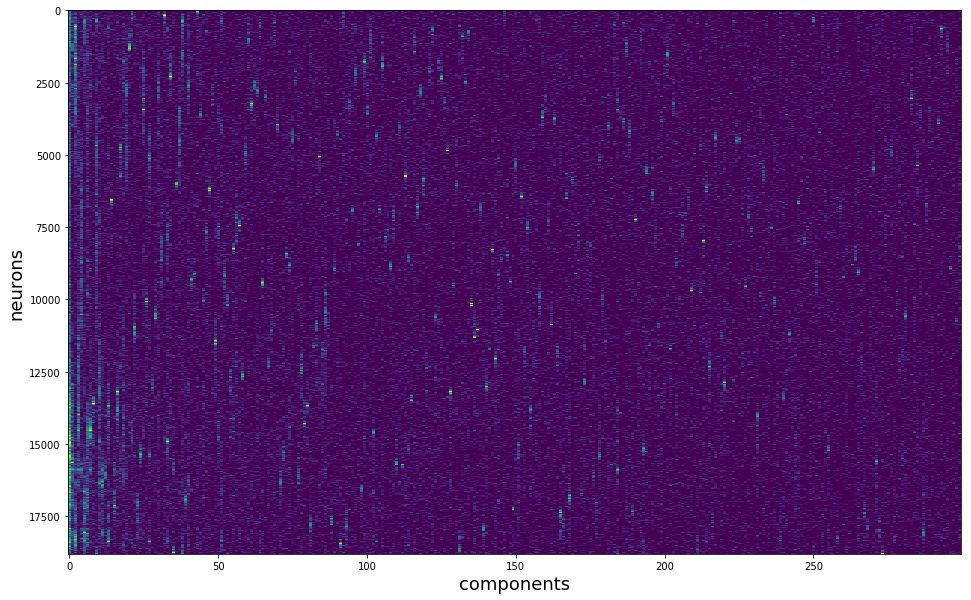

In [9]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np

model = mapping.Rastermap(n_components=2).fit(U)
isort = np.argsort(model.embedding[:,0])
print(isort)
Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()


(18795, 300)


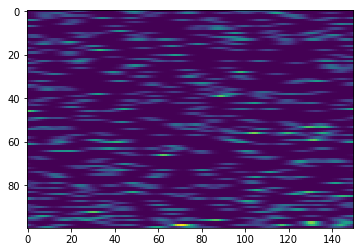

In [51]:
print(Sm.shape)

plt.imshow(Sm[:15000,100].reshape(100,150))

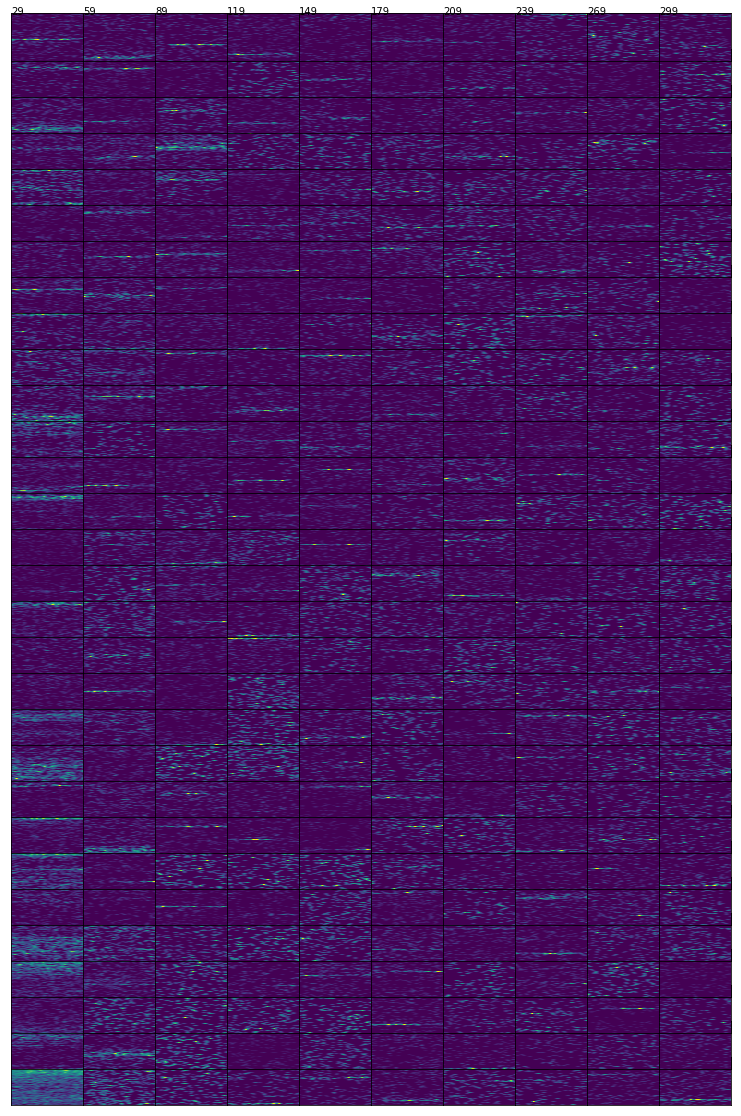

In [66]:
fig=plt.figure(figsize=(10,15))
ax=[]
i=0
mat=Sm.reshape(Sm.shape[0],10,30)
for ind1 in range(0,10):
    for ind2 in range(0,30):
        ax=fig.add_axes([ind1/10,ind2/30,1./10,1./15])
        ax.imshow(mat[:15000,ind1,ind2].reshape(100,150))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(x=ind1/10,y=ind2/15,s=str(i))
        i+=1
plt.show()

In [10]:
print(end-start)

8709.822373628616


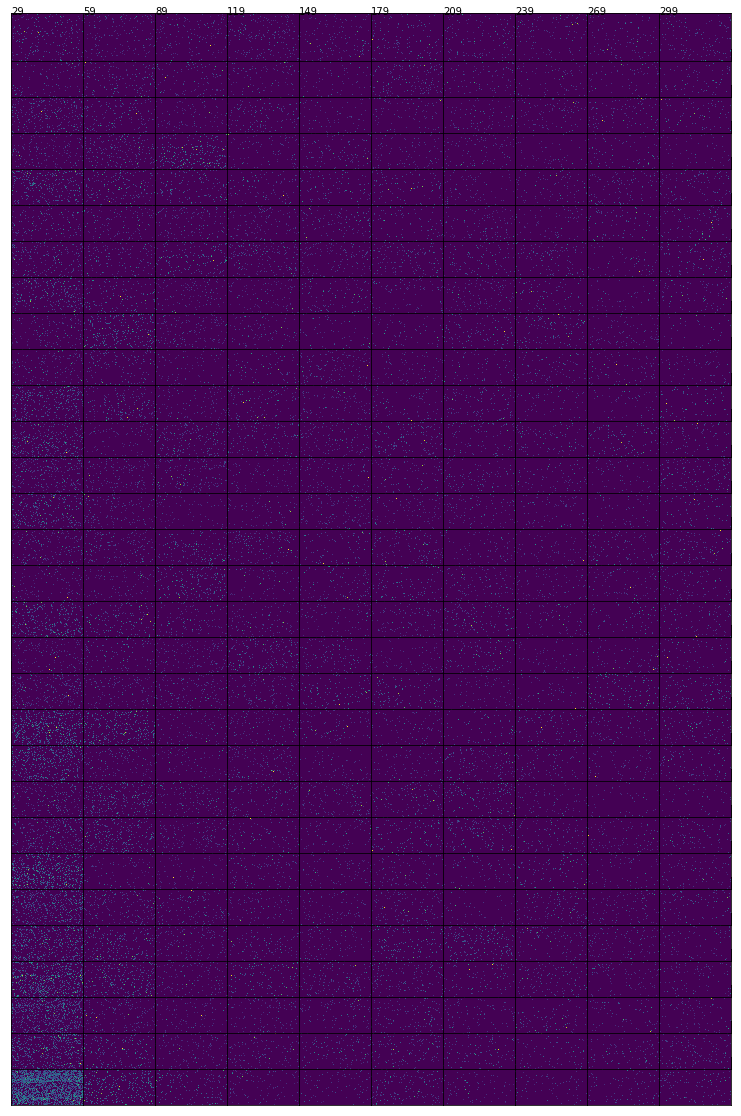

In [67]:
fig=plt.figure(figsize=(10,15))
ax=[]
i=0
mat=U.reshape(U.shape[0],10,30)
for ind1 in range(0,10):
    for ind2 in range(0,30):
        ax=fig.add_axes([ind1/10,ind2/30,1./10,1./15])
        ax.imshow(mat[:15000,ind1,ind2].reshape(100,150))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(x=ind1/10,y=ind2/15,s=str(i))
        i+=1
plt.show()

In [12]:
stat=np.load('/media/maria/DATA1/Documents/data_for_suite2p/stat.npy')
ypos = np.array([stat[n]['med'][0] for n in range(len(stat))]) 
# (notice the python list comprehension [X(n) for n in range(N)])
xpos = np.array([stat[n]['med'][1] for n in range(len(stat))]) 


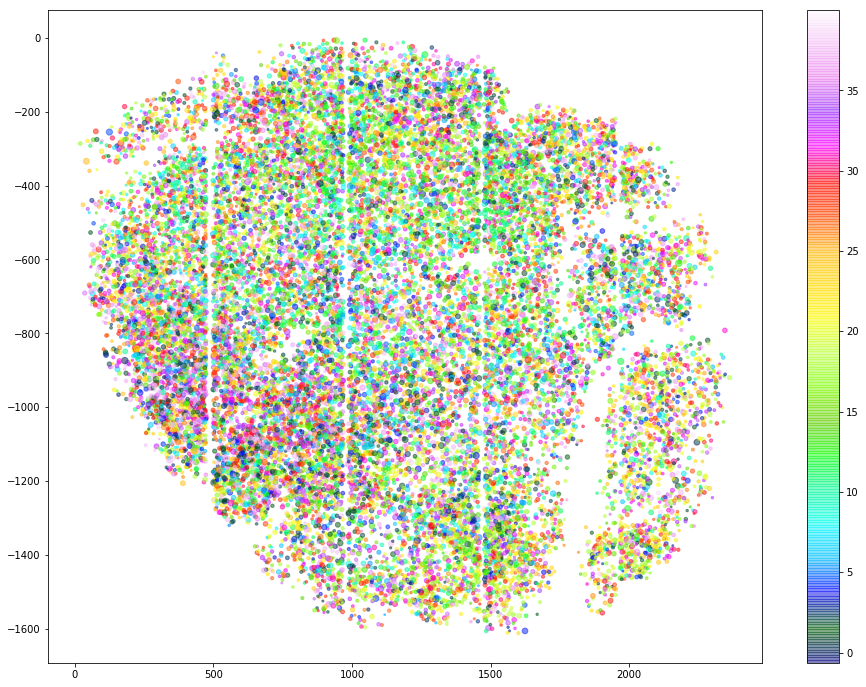

In [13]:
# HERE color cells according to their rastermap embedding
lam=model.lam
plt.figure(figsize=(16,12))
plt.scatter(xpos, -ypos, s=50*lam/np.max(lam), c=model.embedding[:,0], 
            cmap='gist_ncar', alpha = .5)
plt.colorbar()
plt.show()

In [41]:
max_ensemble=np.argmax(U,axis=1)
print(max_ensemble)

[ 30  78   1 ... 148 265  96]


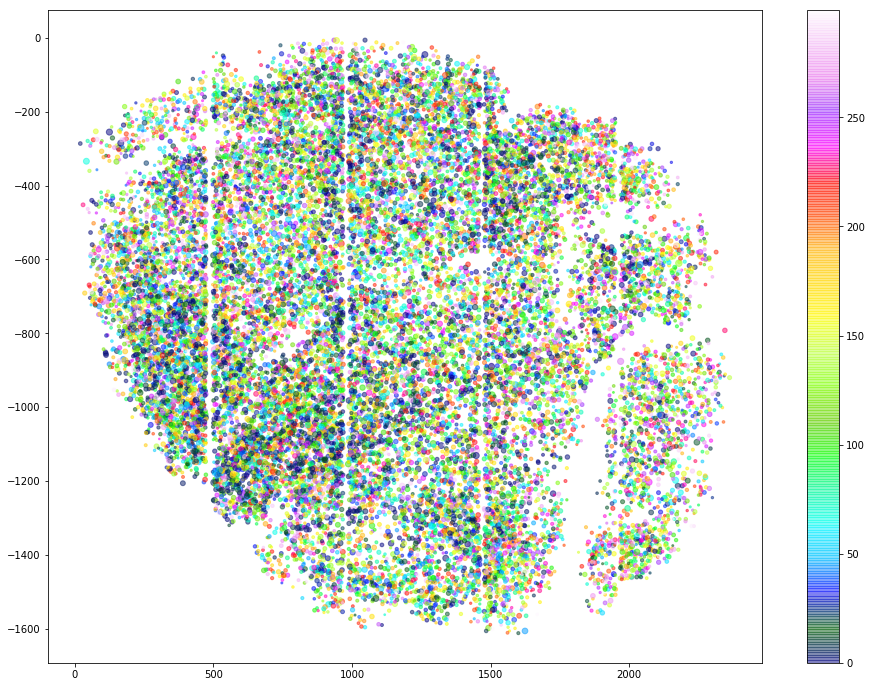

In [42]:
# HERE color cells according to their rastermap embedding
lam=model.lam
plt.figure(figsize=(16,12))
plt.scatter(xpos, -ypos, s=50*lam/np.max(lam), c=max_ensemble, 
            cmap='gist_ncar', alpha = .5)
plt.colorbar()
plt.show()

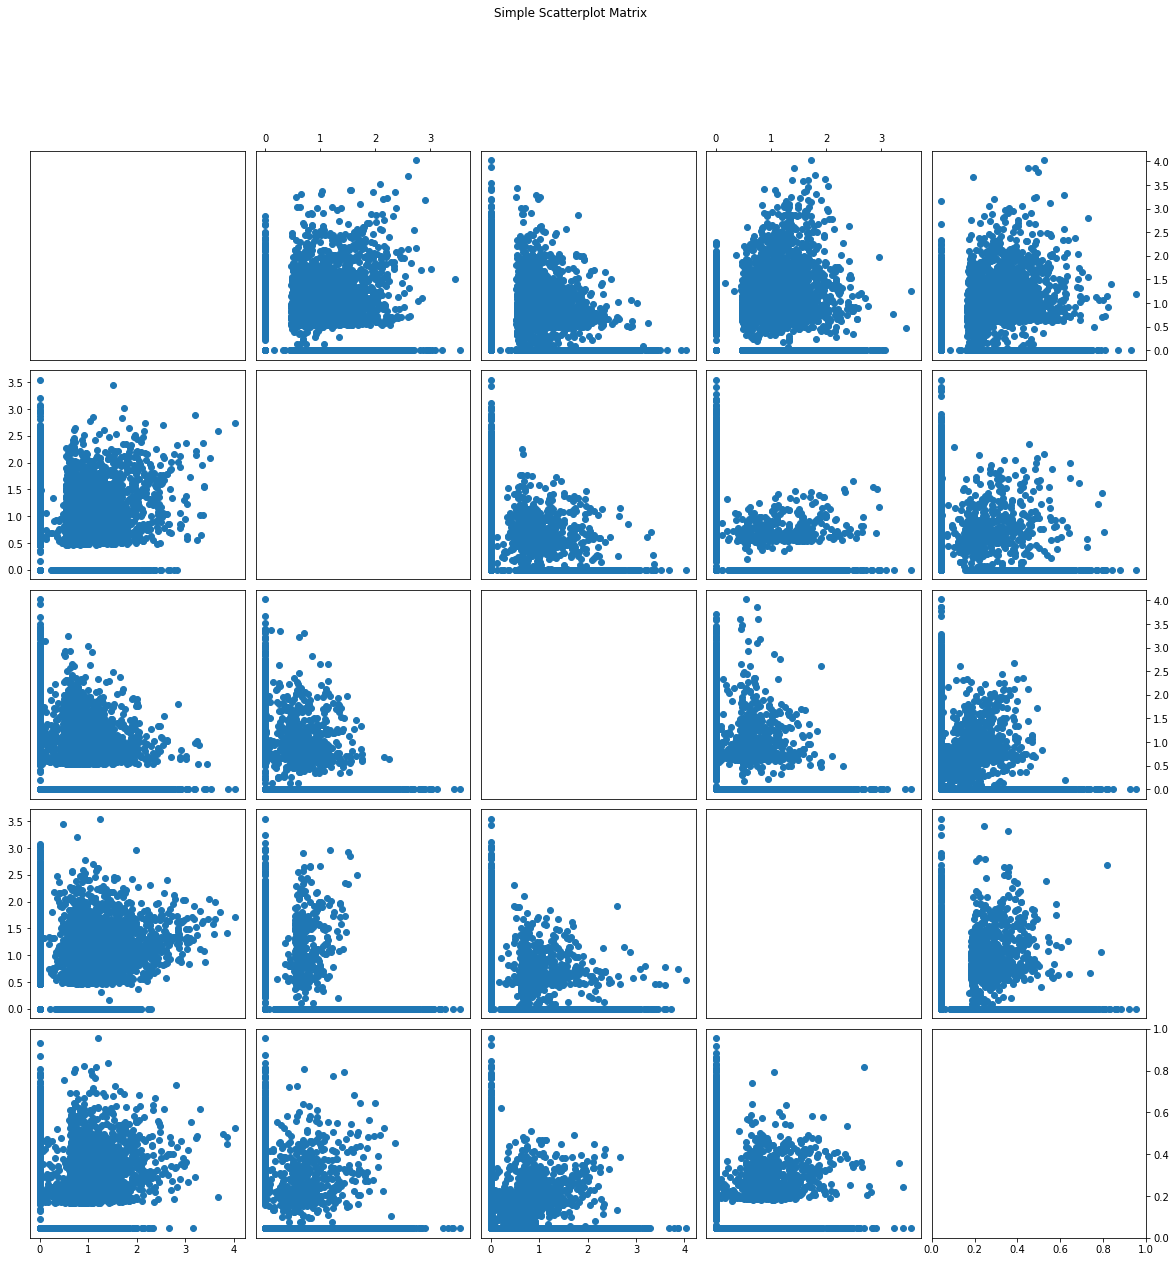

In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(20,20))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    '''
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')
    '''
    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

fig = scatterplot_matrix(U[:,0:5].T, 0,marker='o',linestyle='none')
            #linestyle='none', marker='o', color='black', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.show()

(651,)
[[  0.          1.3003863   0.        ...   0.          0.
    0.       ]
 [  0.          0.         10.979681  ...   0.        206.51726
  288.9171   ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 ...
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.         71.01542     0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   7.716678    4.1587186
    0.       ]]
(array([    4,     5,    22,    95,   123,   168,   233,   268,   327,
         407,   417,   426,   461,   473,   517,   547,   563,   579,
         583,   587,   822,   852,   857,   913,   976,  1033,  1069,
        1070,  1087,  1276,  1304,  1365,  1538,  1543,  1619,  1680,
        1706,  1722,  1759,  1824,  1834,  1838,  1862,  1952,  1966,
        2011,  2136,  2150,  2224,  2284,  2347,  2377,  2380,  2431,
        2486,  2501,  2503,  2528,  2548,  2555,  2601,  2633,  2646,
        2690,  2702,  2708,  2712,  2728

(array([ 346., 5556., 2998.,  620.,  242.,   86.,   24.,   12.,    6.,
          10.]),
 array([-0.10348085, -0.034978  ,  0.03352485,  0.1020277 ,  0.17053055,
         0.2390334 ,  0.30753625,  0.3760391 ,  0.44454195,  0.5130448 ,
         0.58154765]),
 <a list of 10 Patch objects>)

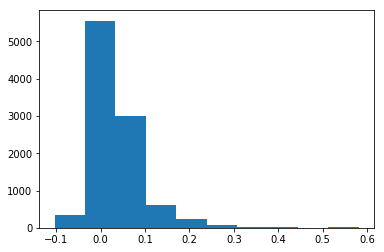

In [102]:
neurons=np.nonzero(U[:,200])
print(neurons[0].shape)
ensemble_X=X[neurons,:][0]
print(ensemble_X)
print(neurons)
#for j in range(0,10):
    #plt.plot(ensemble_X[j,0:200])
    #plt.show()

corr_lst=[]
for i in range(0,100):
    for j in range(0,100):
        if j!=i:
            #print(j,i)
            corr_lst.append(np.corrcoef(ensemble_X[j,:],ensemble_X[i,:])[0,1])
#print(corr_lst)
plt.hist(corr_lst)


nmin 20
0.0026700496673583984
0.023670196533203125
0.025570154190063477
0.039994001388549805
(1520, 1600)
(70,)
1.0
time; iteration;  explained PC variance
0.70s     0        0.3452      8
4.95s    10        0.6819      24
9.11s    20        0.9066      80
13.34s    30        0.9569      360
17.78s    40        0.9709      840
22.29s    50        0.9798      1520
26.78s    60        0.9810      1520
30.73s   final      0.9810
135.89s upsampled    0.9810
[15550  3830 14045 ...  9358 13655 14187]
[[0.14866471 0.         0.28488504 ... 0.         0.         0.        ]
 [0.16786862 0.         0.3084643  ... 0.         0.         0.        ]
 [0.2040737  0.         0.34725283 ... 0.         0.         0.        ]
 ...
 [0.89452913 0.         0.         ... 0.         0.         0.        ]
 [0.89362486 0.         0.         ... 0.         0.         0.        ]
 [0.89370137 0.         0.         ... 0.         0.         0.        ]]


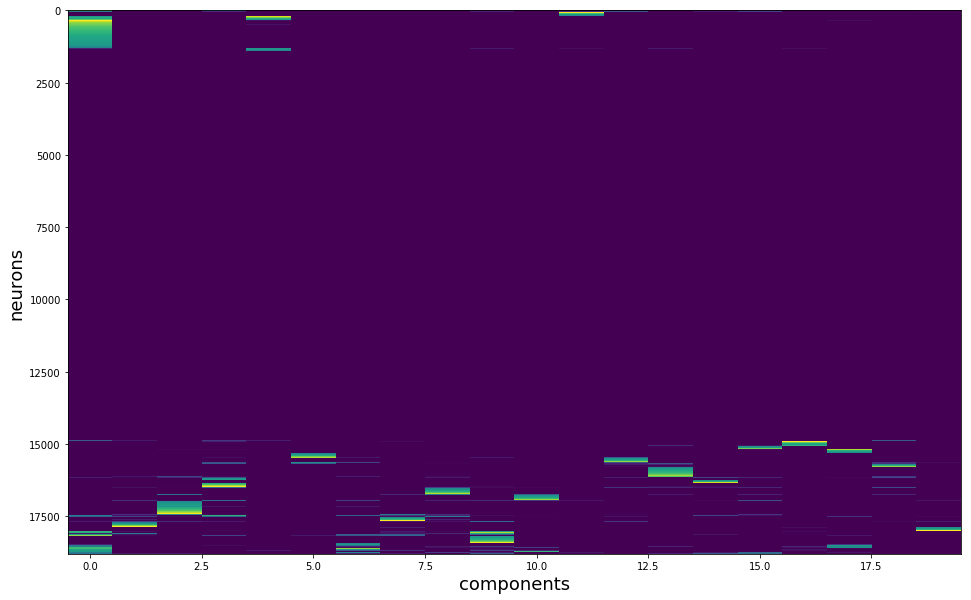

In [4]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np

model = mapping.Rastermap(n_components=2).fit(U)
isort = np.argsort(model.embedding[:,0])
print(isort)
Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

(18795, 20)


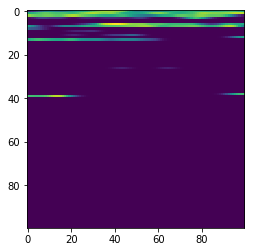

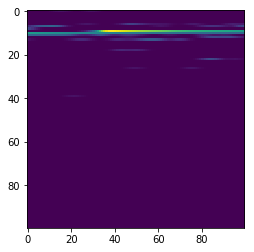

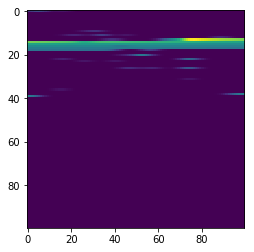

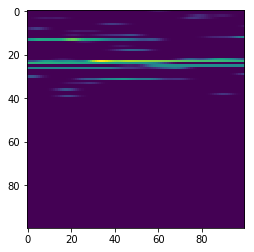

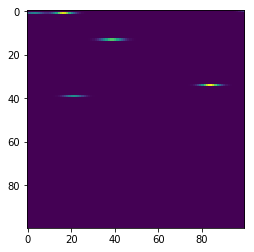

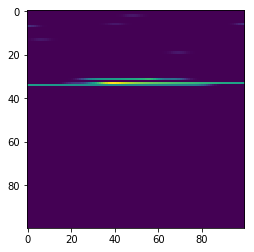

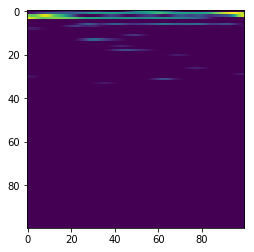

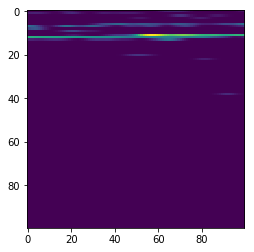

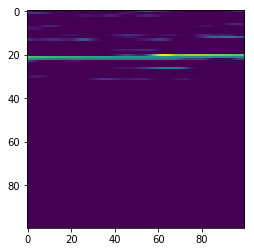

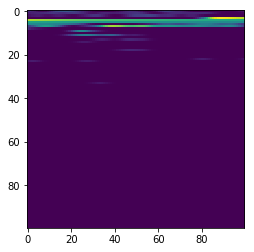

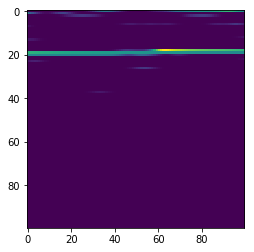

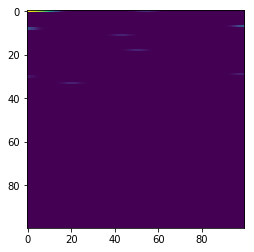

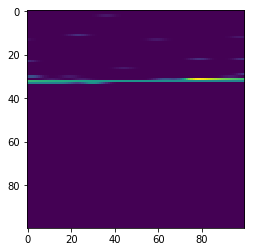

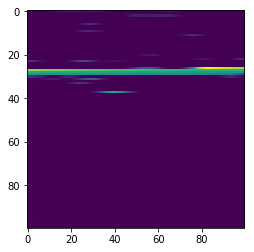

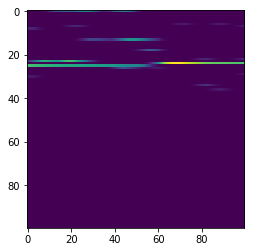

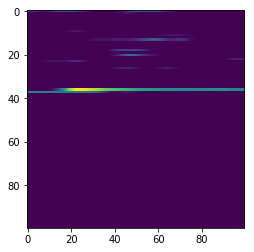

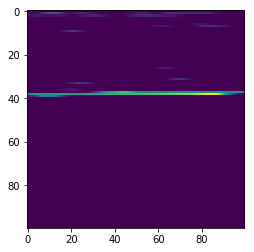

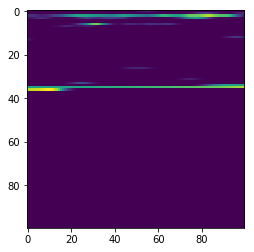

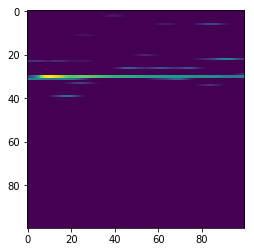

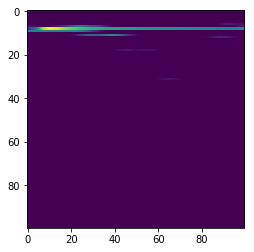

In [16]:
print(Sm.shape)
for j in range(0,20):
    plt.imshow(Sm[:10000,j].reshape((100,100)))
    plt.show()

(1672,)
[[   0.        1241.1108    1102.312     ...    0.           0.
     0.       ]
 [   0.        1041.6638     630.4017    ...    0.           0.
     0.       ]
 [   0.          17.656403  1464.1046    ...    1.488335     0.
     0.       ]
 ...
 [   0.           2.7080553   47.460415  ...    0.           0.
     0.       ]
 [   0.           1.6462301   31.933199  ...    0.           0.
     0.       ]
 [   0.           0.           5.282364  ...    7.8454447    0.
     0.       ]]
(array([   32,    63,    70, ..., 18759, 18763, 18788]),)


(array([ 778., 3676., 3078., 1442.,  578.,  202.,   96.,   24.,   20.,
           6.]),
 array([-0.08321287, -0.01630334,  0.05060618,  0.1175157 ,  0.18442523,
         0.25133475,  0.31824427,  0.38515379,  0.45206332,  0.51897284,
         0.58588236]),
 <a list of 10 Patch objects>)

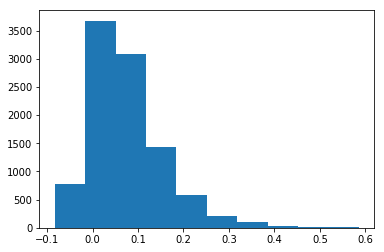

In [14]:
neurons=np.nonzero(U[:,0])
print(neurons[0].shape)
ensemble_X=X[neurons,:][0]
print(ensemble_X)
print(neurons)
#for j in range(0,10):
    #plt.plot(ensemble_X[j,0:200])
    #plt.show()

corr_lst=[]
for i in range(0,100):
    for j in range(0,100):
        if j!=i:
            #print(j,i)
            corr_lst.append(np.corrcoef(ensemble_X[j,:],ensemble_X[i,:])[0,1])
#print(corr_lst)
plt.hist(corr_lst)
